<a href="https://colab.research.google.com/github/tharunalla/DeepLearning/blob/main/Lab_3_BL_EN_U4CSE22173.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

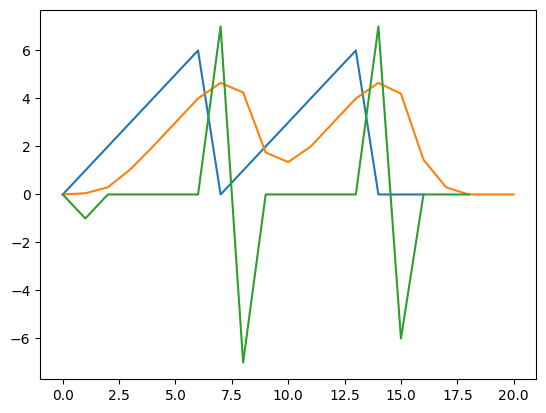

In [ ]:
#Q1
import numpy
import matplotlib.pyplot as plt
X = [0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05,0.2,0.5,0.2,0.05]
H_H = [-1,2,-1]
y_low = numpy.convolve(X,H_L)
y_high = numpy.convolve(X,H_H)
plt.plot(X)
plt.plot(y_low)
plt.plot(y_high)

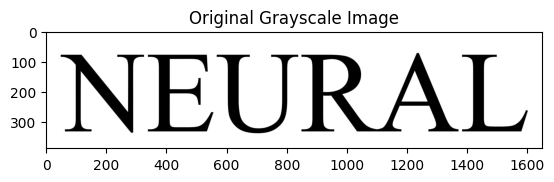

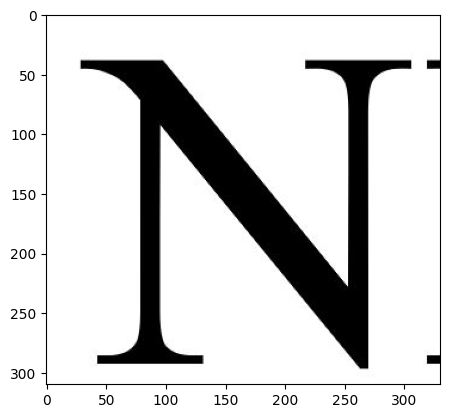

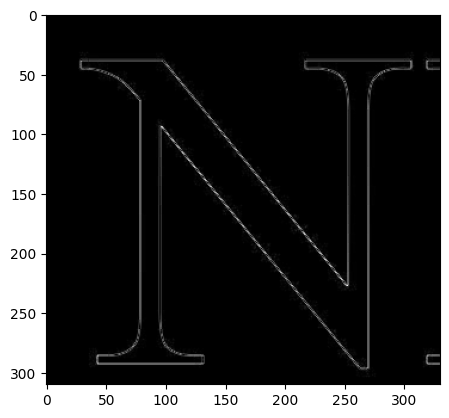

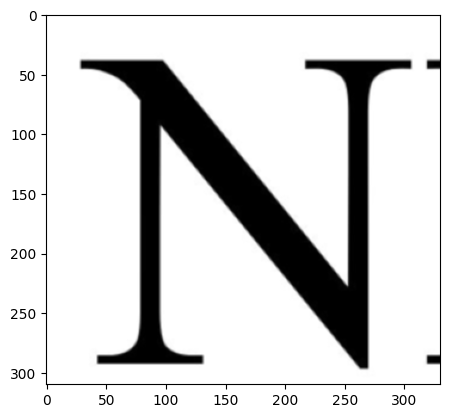

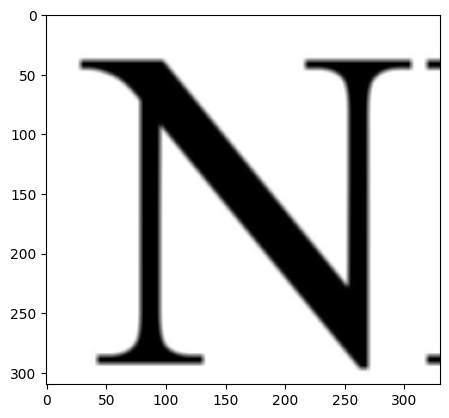

In [ ]:
#Q2
import numpy as np
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
im = imread("Neural.JPG")
img = rgb2gray(im)*255
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.show()

img1 = img[40:350,20:350]
plt.imshow(img1,cmap='gray')
plt.show()
fil1 = np.array([[ 0, -1,  0],
                   [-1, 4, -1],
                   [ 0, -1, 0]])

fil2 = np.array([[ 0.2, 0.5,  0.2],
                   [0.5, 1, 0.5],
                   [0.2, 0.5, 0.2]])

fil3 = np.array([[ 0.1,0.1,0.1, 0.1, 0.1],
                   [0.1,0.1,0.1, 0.1, 0.1],
                   [0.1,0.1,0.1, 0.1, 0.1],
                   [0.1,0.1,0.1, 0.1, 0.1],
                   [0.1,0.1,0.1, 0.1, 0.1]])

grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

plt.imshow(abs(grad1),cmap='gray',vmin=np.min(grad2),vmax = np.max(grad3)
 )
plt.show()
plt.imshow(grad2,cmap='gray')
plt.show()
plt.imshow(grad3,cmap='gray')

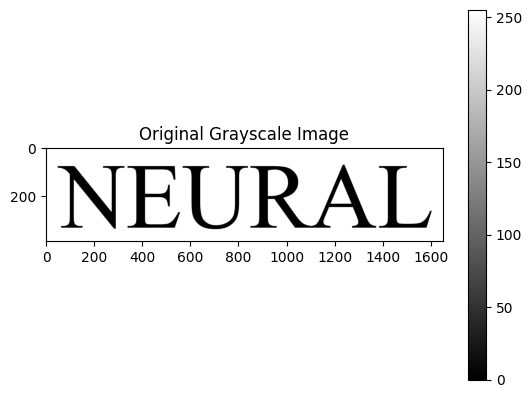

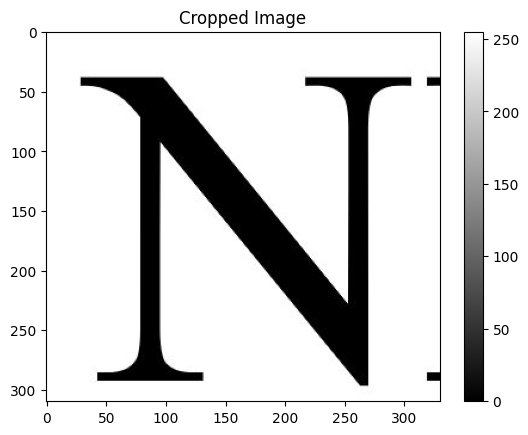

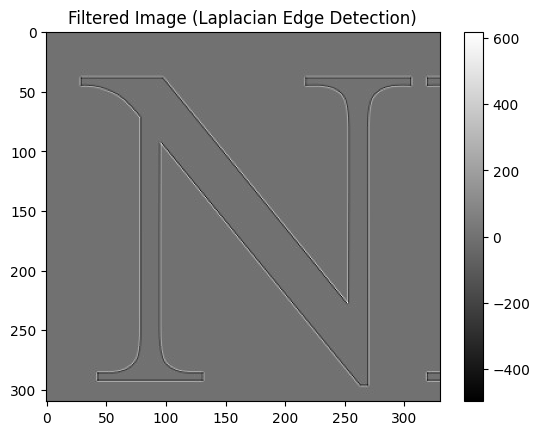

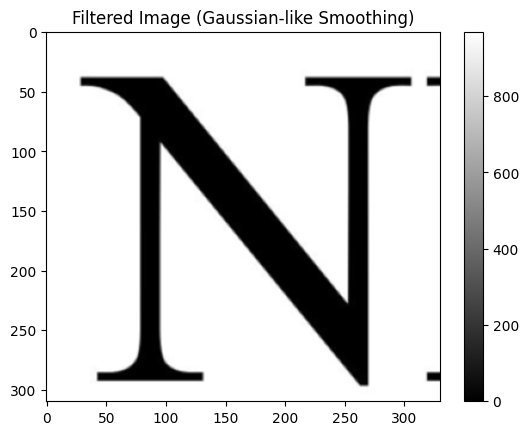

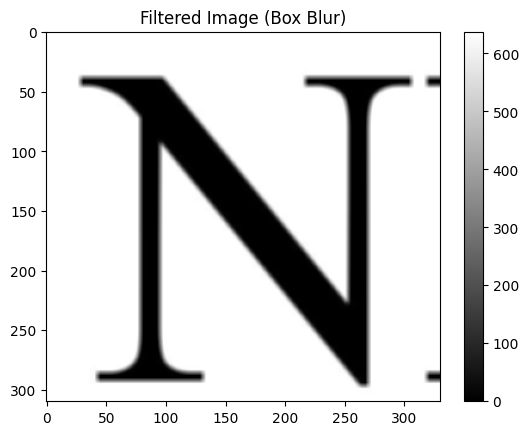

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

def load_image(image_path):
    """Loads an image, converts it to grayscale, and scales pixel values."""
    im = imread(image_path)
    img_gray = rgb2gray(im) * 255  # Convert to grayscale and scale values
    return img_gray

def apply_filter(image, kernel):
    """Applies a convolution filter to the given image."""
    return signal.convolve2d(image, kernel, boundary='symm', mode='same')

def display_image(image, title="Image"):
    """Displays an image with a title."""
    plt.imshow(image, cmap='gray', vmin=np.min(image), vmax=np.max(image))
    plt.title(title)
    plt.colorbar()
    plt.show()

# Load and preprocess image
img = load_image("Neural.JPG")

# Display original grayscale image
display_image(img, "Original Grayscale Image")

# Crop the image
img_cropped = img[40:350, 20:350]

# Display cropped image
display_image(img_cropped, "Cropped Image")

# Define filters
filters = {
    "Laplacian Edge Detection": np.array([[ 0, -1,  0],
                                          [-1,  4, -1],
                                          [ 0, -1,  0]]),

    "Gaussian-like Smoothing": np.array([[ 0.2, 0.5,  0.2],
                                          [ 0.5,  1,  0.5],
                                          [ 0.2, 0.5,  0.2]]),

    "Box Blur": np.full((5, 5), 0.1)
}

# Apply filters and display results
for filter_name, kernel in filters.items():
    filtered_img = apply_filter(img_cropped, kernel)
    display_image(filtered_img, f"Filtered Image ({filter_name})")
